In [1]:
import numpy as np

In [2]:
import tensorflow as tf

2025-03-30 15:06:20.656832: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [6]:
import os

In [8]:
TRAIN_DIR = '../flowers_kaggle/Train/'
TEST_DIR = '../flowers_kaggle/Test/'
VAL_DIR = '../flowers_kaggle/Validate/'

if not os.path.isdir(TRAIN_DIR):
    print(f'{TRAIN_DIR} nu este director')
    
if not os.path.isdir(TEST_DIR):
    print(f'{TEST_DIR} nu este director')
    
if not os.path.isdir(VAL_DIR):
    print(f'{VAL_DIR} nu este director')

In [9]:
## DATA AUGMENTATION 

train_datagen = ImageDataGenerator(
                    rescale = 1. / 255,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)

train_set = train_datagen.flow_from_directory(TRAIN_DIR, target_size=(224,224), batch_size=32, class_mode='categorical')

val_datagen = ImageDataGenerator(rescale = 1. / 255)

val_set = train_datagen.flow_from_directory(VAL_DIR, target_size=(224,224), batch_size=32, class_mode='categorical')


Found 3024 images belonging to 5 classes.
Found 644 images belonging to 5 classes.


In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))
])

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2) ))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(filters=96, kernel_size=(5,5), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2) ))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(filters=96, kernel_size=(5,5), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2) ))
model.add(tf.keras.layers.Dropout(0.5))

# Flatten

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=512, activation='relu'))

# Output 

model.add(tf.keras.layers.Dense(units=5, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 224, 224, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 112, 112, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 56, 56, 96)     │       153,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 28, 28, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28, 28, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 96)     │       230,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,634,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,074,757 (38.43 MB)

 Trainable params: 10,074,757 (38.43 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_set, validation_data=val_set, batch_size=32, epochs=20)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

print(acc)
print(val_acc)

/Users/user/Documents/GitHub/Deep-Learning-TensorFlow/env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.2820 - loss: 2.3043 - val_accuracy: 0.2997 - val_loss: 2.0960
Epoch 2/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.4508 - loss: 1.3423 - val_accuracy: 0.4938 - val_loss: 1.3152
Epoch 3/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.5086 - loss: 1.2149 - val_accuracy: 0.5994 - val_loss: 1.0377
Epoch 4/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.5913 - loss: 1.0757 - val_accuracy: 0.5342 - val_loss: 1.1631
Epoch 5/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.6190 - loss: 1.0004 - val_accuracy: 0.6398 - val_loss: 0.9404
Epoch 6/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.6179 - loss: 0.9511 - val_accuracy: 0.6304 - val_loss: 0.9821
Epoch 7/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.6317 - loss: 0.9857 - val_accuracy: 0.6522 - val_loss: 0.9213
Epoch 8/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.6770 - loss: 0.8366 - val_accuracy: 0.6708 - v

In [29]:
save_path = os.getcwd()
if not os.path.isdir(save_path):
    print('not good')
else:
    print(f'path{save_path}')
print(os.path.join(save_path,'flowers.keras'))

path/Users/user/Documents/GitHub/Deep-Learning-TensorFlow/FlowerClassifier
/Users/user/Documents/GitHub/Deep-Learning-TensorFlow/FlowerClassifier/flowers.keras


In [30]:
path = os.path.join(save_path, 'flowers.keras')
print(path)
model.save(path)

/Users/user/Documents/GitHub/Deep-Learning-TensorFlow/FlowerClassifier/flowers.keras


In [32]:
epochs_range = range(20)

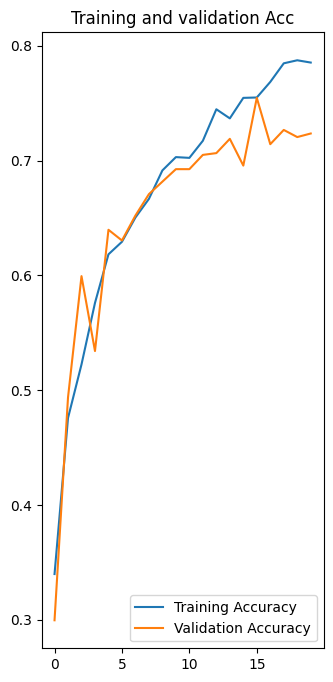

In [35]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation Acc')
plt.show()

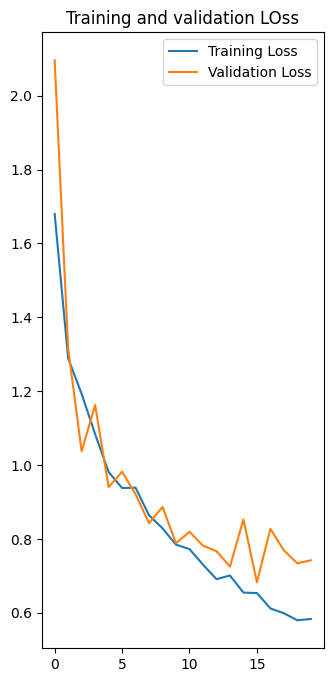

In [36]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and validation LOss')
plt.show()